<a href="https://colab.research.google.com/github/iuricimatec/depthmap/blob/main/depthmap_stereo_grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How do I extract depth from an image?
How do we estimate depth? Our eyes estimate depth by comparing the image obtained by our left and right eye. The minor displacement between both viewpoints is enough to calculate an approximate depth map. We call the pair of images obtained by our eyes a stereo pair.

if so, I must use 2 cameras to simulate such scenario. 
What's the left camera? and what's the right one?


References
https://docs.opencv.org/3.4/dd/d53/tutorial_py_depthmap.html

https://ez.analog.com/depth-perception-ranging-technologies/lidar-solutions/3d-tof-depth-sensing/f/q-a/561113/how-to-get-a-valid-depth-map-in-python

https://github.com/analogdevicesinc/aditof_sdk/blob/master/bindings/python/examples/first_frame/first_frame.py

https://li-chongyi.github.io/proj_SR.html


https://answers.opencv.org/question/185947/how-to-resolve-a-sadwindowsize-error/


https://medium.com/yodayoda/from-depth-map-to-point-cloud-7473721d3f

In [ ]:
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


from PIL import Image

# to mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
pd.set_option('display.max_columns', None)

MessageError: ignored

In [ ]:
# import dataset
df = pd.read_csv(
      '/content/gdrive/MyDrive/MCTI/Bolsa/dataset_skeleton.csv', index_col=0
)

In [ ]:
df.count()

In [ ]:
df

In [ ]:
# Comparing an image and its neighboor of the same camera.
# Left image paths
pathL = '/content/gdrive/MyDrive/MCTI/dataset/camera1/new/'
# Right image paths
pathR = '/content/gdrive/MyDrive/MCTI/dataset/camera1/new/'
print(os.listdir(pathL))
print(os.listdir(pathR))
# Potential fix 
# os.environ['OPENCV_IO_MAX_IMAGE_PIXELS']=str(2**64)

filenameL = pathL + '0021.png'
filenameR = pathR + '0022.png'

In [ ]:
imgL = cv.imread(filenameL, cv.IMREAD_GRAYSCALE)
imgR = cv.imread(filenameR, cv.IMREAD_GRAYSCALE)
# print(imgL)
# print(imgR)

In [ ]:
if imgL == 'None' or imgR == 'None':
  print("Image's empty!")
  print("Shapes: ", imgL.shape, imgR.shape)


In [ ]:
imgR.size

In [ ]:
imgR.shape

In [ ]:
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
print(stereo)

In [ ]:
disparity = stereo.compute(imgL,imgR)
print(disparity.size)
print(disparity.shape)
print(disparity)

In [ ]:
plt.imshow(disparity,'gray')
# plt.imshow(disparity)
plt.show()

In [ ]:
# Disparity from Cameras 1 and 3

In [ ]:
print(disparity)

[[-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]]


In [ ]:
# Left image paths
pathL = '/content/gdrive/MyDrive/MCTI/dataset/camera1/new/'
# Right image paths
pathR = '/content/gdrive/MyDrive/MCTI/dataset/camera3/new/'
print(os.listdir(pathL))
print(os.listdir(pathR))

# Potential fix 
# os.environ['OPENCV_IO_MAX_IMAGE_PIXELS']=str(2**64)

filenameL = pathL + '0001.png'
filenameR = pathR + '0001.png'

['0085.png', '1288.png', '2636.png', '3312.png', '0052.png', '1505.png', '2965.png', '2018.png', '0046.png', '1539.png', '2554.png', '2024.png', '1713.png', '1908.png', '1707.png', '1934.png', '2742.png', '0250.png', '2568.png', '2030.png', '2756.png', '1061.png', '2597.png', '3110.png', '1075.png', '3448.png', '0278.png', '0287.png', '2583.png', '3104.png', '0244.png', '1920.png', '0293.png', '2540.png', '3105.png', '2233.png', '1048.png', '1935.png', '0279.png', '0292.png', '1060.png', '2582.png', '1712.png', '1074.png', '3139.png', '2541.png', '2596.png', '3111.png', '3138.png', '2569.png', '2555.png', '1706.png', '1049.png', '2226.png', '2232.png', '2227.png', '0286.png', '2743.png', '2019.png', '2031.png', '1921.png', '0090.png', '3313.png', '1909.png', '1289.png', '3475.png', '3461.png', '1510.png', '3449.png', '0084.png', '1276.png', '3307.png', '1262.png', '1538.png', '0251.png', '0245.png', '2780.png', '2757.png', '1504.png', '2025.png', '2958.png', '2794.png', '1470.png', '29

In [ ]:
imgL = cv.imread(filenameL, cv.IMREAD_GRAYSCALE)
imgR = cv.imread(filenameR, cv.IMREAD_GRAYSCALE)

print(imgL)
# print(imgR)



[[ 54  54  56 ... 169 165 171]
 [ 57  55  56 ... 168 173 172]
 [ 59  56  55 ... 169 169 170]
 ...
 [ 30  31  30 ...  29  27  26]
 [ 30  30  30 ...  28  27  25]
 [ 31  31  31 ...  29  27  25]]


In [ ]:
# cv.imshow(window_name, imgL)
# cv.imshow(window_name, imgR)
if imgL == 'None' or imgR == 'None':
  print("Image's empty!")
  print("Shapes: ", imgL.shape, imgR.shape)


<ipython-input-17-5b1ad68629a6>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if imgL == 'None' or imgR == 'None':


In [ ]:
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
print(stereo)


< cv2.StereoBM 0x7f2c7d1c5a50>


In [ ]:

disparity = stereo.compute(imgL,imgR)
print(disparity.size)
print(disparity.shape)
print(disparity)

307200
(640, 480)
[[-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 ...
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]
 [-16 -16 -16 ... -16 -16 -16]]


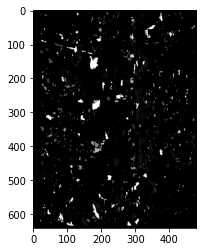

In [ ]:
plt.imshow(disparity,'gray')
# plt.imshow(disparity)
plt.show()